In [ ]:
!wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
!unzip bike+sharing+dataset.zip

--2024-08-27 14:15:03--  https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bike+sharing+dataset.zip.3’

bike+sharing+datase     [ <=>                ] 273.43K  --.-KB/s    in 0.05s   

2024-08-27 14:15:03 (5.20 MB/s) - ‘bike+sharing+dataset.zip.3’ saved [279992]

Archive:  bike+sharing+dataset.zip
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [20]:
!pip install category_encoders


Mean Squared Error: 15112.954426556415
R-squared: 0.5227298876374706


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 TargetEncoder(cols=['season', 'weathersit', 'day_night'])),
                ('model', LinearRegression())])

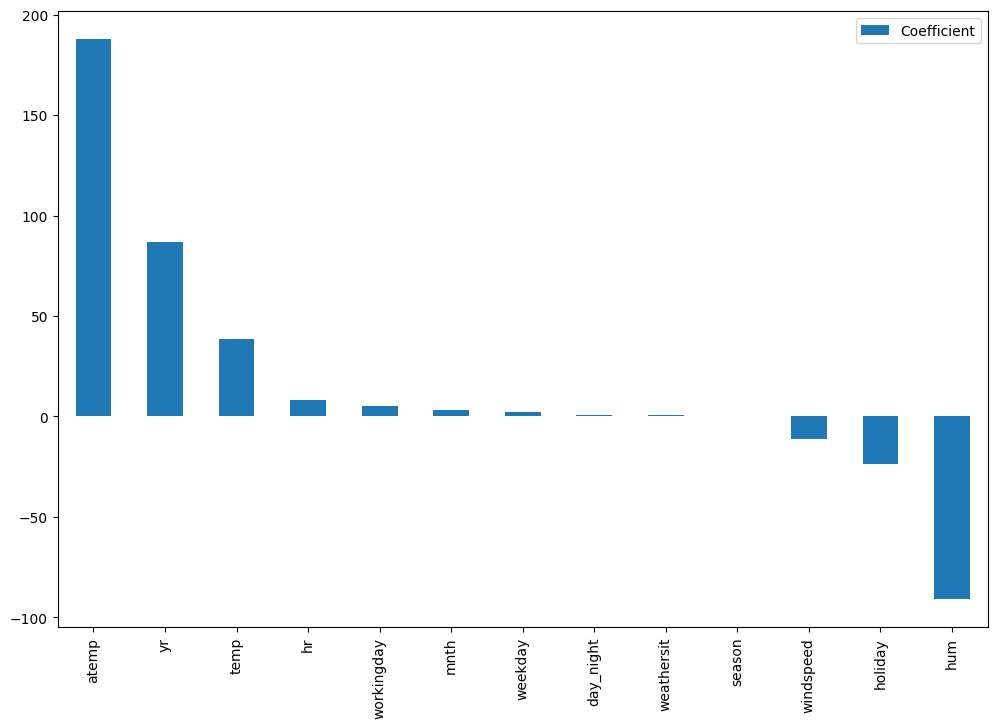

In [ ]:
import pandas as pd
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

# Load and preprocess the data
df = pd.read_csv('hour.csv')
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

x = df.drop(columns=['cnt'])
y = df['cnt']

# Numerical features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

x[numerical_features] = numerical_pipeline.fit_transform(x[numerical_features])

# Categorical features
categorical_features = ['season', 'weathersit', 'day_night']
target_encoder = ce.TargetEncoder(cols=categorical_features)
x_encoded = target_encoder.fit_transform(x[categorical_features], y)

# Concatenate the encoded categorical features with the numerical features
x = pd.concat([x.drop(columns=categorical_features), x_encoded], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(x_train, y_train)

# Feature importances (for linear regression, we use coefficients)
coefficients = pd.DataFrame(model.coef_, index=x_train.columns, columns=["Coefficient"])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

coefficients.plot(kind='bar', figsize=(12, 8))

# Predictions and evaluation
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# ML Pipeline
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', target_encoder),
    ('model', LinearRegression())
])

set_config(display='diagram')
final_pipeline

In [ ]:
#Linear regression from scratch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import set_config

# Load and preprocess the data
df = pd.read_csv('hour.csv')
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

x = df.drop(columns=['cnt'])
y = df['cnt']

# Numerical features
numerical_features = ['temp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

x[numerical_features] = numerical_pipeline.fit_transform(x[numerical_features])

# Categorical features
categorical_features = ['season', 'weathersit', 'day_night']
target_encoder = ce.TargetEncoder(cols=categorical_features)
x_encoded = target_encoder.fit_transform(x[categorical_features], y)

# Concatenate the encoded categorical features with the numerical features
x = pd.concat([x.drop(columns=categorical_features), x_encoded], axis=1)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Linear Regression from Scratch
def compute_coefficients(X, y):
    """Compute the coefficients using the normal equation."""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
    return np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

def predict(X, theta):
    """Predict using the coefficients."""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
    return X_b.dot(theta)

# Prepare data
X_train = x_train.values
y_train = y_train.values
X_test = x_test.values
y_test = y_test.values

# Compute coefficients
theta = compute_coefficients(X_train, y_train)

# Make predictions
y_pred = predict(X_test, theta)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# ML Pipeline (for processing and encoding)
final_pipeline = Pipeline([
    ('num_preprocess', numerical_pipeline),
    ('cat_preprocess', target_encoder ),
    ('model', LinearRegression())
])

set_config(display='diagram')
final_pipeline

Mean Squared Error: 15112.954426556145
R-squared: 0.5227298876374791


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('cat_preprocess',
                 TargetEncoder(cols=['season', 'weathersit', 'day_night'])),
                ('model', LinearRegression())])